<a href="https://www.kaggle.com/code/davewhatever/yolo-bees-detection?scriptVersionId=212834318" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🐝 Bee Detection with YOLO

Dataset: [Link](https://www.kaggle.com/datasets/lara311/bee-detection-dataset)

Detecting bees using AI could be of great importance for nature conservation and make tasks such as counting bees in a specific area easier.

Different detection models will be tested in this Notebook:
- [x] yolov8n
- [ ] yolov11
- [ ] DETR

Also, the models will be evaluated and set in comparison to another.

**The Notebook and the files were all set up on kaggle**

In [1]:
import numpy as np
import pandas as pd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bee-detection-dataset/README.dataset.txt
/kaggle/input/bee-detection-dataset/README.roboflow.txt
/kaggle/input/bee-detection-dataset/data.yaml
/kaggle/input/bee-detection-dataset/valid/labels/from-walk_mp4-386_jpg.rf.ecb4f17f793c1f994e6160457016c5a2.txt
/kaggle/input/bee-detection-dataset/valid/labels/from-walk_mp4-524_jpg.rf.074eef963f193bc64cc54376ee0239ea.txt
/kaggle/input/bee-detection-dataset/valid/labels/bees3_mp4-258_jpg.rf.6bf2e9ac726b44dca9882689b6921266.txt
/kaggle/input/bee-detection-dataset/valid/labels/all-movs_mp4-802_jpg.rf.1dae94dfc5553b0d85d6bca9b48ddf67.txt
/kaggle/input/bee-detection-dataset/valid/labels/from-walk_mp4-1339_jpg.rf.aaa7292912e29f69e1226edb3fa588c7.txt
/kaggle/input/bee-detection-dataset/valid/labels/lots-of-bees_mp4-408_jpg.rf.2c86ef2b99df3b5333e7a6e3e22d740e.txt
/kaggle/input/bee-detection-dataset/valid/labels/bees-2_mp4-29_jpg.rf.09281f6c6d00077b6bb253115bbb6a33.txt
/kaggle/input/bee-detection-dataset/valid/labels/from-walk_mp4-155_jpg.

In [2]:
import torch

if torch.cuda.is_available():
    print("GPU is available!!!!!")
else:
    print("GPU is not available :-(")

GPU is available!!!!!


In [3]:
!pip install ultralytics

Looking in links: /kaggle/input/pm-72866197-at-12-13-2024-08-07-10/


In [4]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
# Load YOLOv8 model
model = YOLO('yolov8n.pt')  # You can choose other models like 'yolov8s.pt'

# Train the model
model.train(data='/kaggle/input/bee-detection-dataset/data.yaml', epochs=10, imgsz=640)

100%|██████████| 6.25M/6.25M [00:00<00:00, 80.5MB/s]


Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/bee-detection-dataset/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 17.4MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 74.7MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/bee-detection-dataset/train/labels... 5640 images, 892 backgrounds, 0 corrupt: 100%|██████████| 5640/5640 [00:24<00:00, 231.68it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/bee-detection-dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.21). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/bee-detection-dataset/valid/labels... 1604 images, 237 backgrounds, 0 corrupt: 100%|██████████| 1604/1604 [00:06<00:00, 231.28it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/bee-detection-dataset/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.21G      2.226      3.786      1.366          9        640: 100%|██████████| 353/353 [01:10<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.24it/s]


                   all       1604       1950      0.526      0.457       0.44      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.17G      2.131      1.932      1.349          5        640: 100%|██████████| 353/353 [01:07<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  6.06it/s]

                   all       1604       1950       0.64      0.526      0.559      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.15G      2.112      1.661      1.357         13        640: 100%|██████████| 353/353 [01:06<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  6.21it/s]

                   all       1604       1950       0.66      0.561      0.605      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.14G       2.06      1.548      1.322         16        640: 100%|██████████| 353/353 [01:07<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  6.17it/s]


                   all       1604       1950      0.694      0.599      0.635      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.15G      2.024      1.441      1.309          5        640: 100%|██████████| 353/353 [01:06<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  6.29it/s]

                   all       1604       1950      0.776      0.637      0.717      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.15G      1.967      1.348      1.274          9        640: 100%|██████████| 353/353 [01:07<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  6.00it/s]


                   all       1604       1950      0.763       0.63      0.715      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.16G      1.928      1.295      1.253          6        640: 100%|██████████| 353/353 [01:06<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  6.32it/s]

                   all       1604       1950      0.788      0.657      0.738      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.14G      1.895      1.217      1.232         11        640: 100%|██████████| 353/353 [01:06<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  6.16it/s]


                   all       1604       1950      0.799      0.696      0.774      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.15G      1.851      1.163      1.213          7        640: 100%|██████████| 353/353 [01:06<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  6.05it/s]


                   all       1604       1950      0.797      0.727       0.79      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.15G      1.817      1.094       1.19         10        640: 100%|██████████| 353/353 [01:06<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  6.15it/s]

                   all       1604       1950        0.8      0.733      0.801      0.375



10 epochs completed in 0.214 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  5.91it/s]


                   all       1604       1950      0.801      0.733      0.801      0.376
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bc8d7aa30a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [6]:
# Perform predictions on the test set
results = model.predict(source='/kaggle/input/bee-detection-dataset/test/images', save=True)


image 1/836 /kaggle/input/bee-detection-dataset/test/images/14E57FCA-5541-4694-8511-FDB29B6257A0_mov-12_jpg.rf.e56fea99645f05a1a9b8cdddd51a4aa8.jpg: 384x640 1 bees, 36.4ms
image 2/836 /kaggle/input/bee-detection-dataset/test/images/14E57FCA-5541-4694-8511-FDB29B6257A0_mov-17_jpg.rf.61c6e5629c20dbf28b210d2bc0e1e622.jpg: 384x640 1 bees, 6.2ms
image 3/836 /kaggle/input/bee-detection-dataset/test/images/14E57FCA-5541-4694-8511-FDB29B6257A0_mov-22_jpg.rf.216c3dcc5a1bb4f86ea50247c643a825.jpg: 384x640 1 bees, 6.0ms
image 4/836 /kaggle/input/bee-detection-dataset/test/images/20220708_084534_mp4-40_jpg.rf.796cb1b5e172d63df1c6116c2380cf19.jpg: 288x640 (no detections), 35.4ms
image 5/836 /kaggle/input/bee-detection-dataset/test/images/20220708_084534_mp4-41_jpg.rf.5ace407137441edb6aa602dd5c8bf0d0.jpg: 288x640 1 bees, 6.6ms
image 6/836 /kaggle/input/bee-detection-dataset/test/images/20220708_084534_mp4-48_jpg.rf.25368585d59bdf9bd6db526a84280eff.jpg: 288x640 2 beess, 6.4ms
image 7/836 /kaggle/inpu

Just checking, if the path exists, where the prediction are saved.

In [7]:
output_path = 'runs/detect/train2'
if os.path.exists(output_path):
    print("Output path exists:", output_path)
    print("Files:", os.listdir(output_path))
else:
    print("Output path does not exist.")

Output path exists: runs/detect/train2
Files: ['from-walk_mp4-884_jpg.rf.c3dec48a7ec10f5fe1b9f96d15c400fc.jpg', 'lots-of-bees_mp4-223_jpg.rf.387e9b7640e02f053c24f25af1ab045d.jpg', '20220708_085709_mp4-285_jpg.rf.3aaa2f1efa857172a0fda99662fcb1dc.jpg', 'all-movs_mp4-477_jpg.rf.c351856ee4b6faa3b5886024697f0f15.jpg', 'all-movs_mp4-1752_jpg.rf.79f3527f1cc880de75391c73e6d0f607.jpg', 'from-walk_mp4-991_jpg.rf.b79997f0fee6c7786c7a23d170392414.jpg', '14E57FCA-5541-4694-8511-FDB29B6257A0_mov-22_jpg.rf.216c3dcc5a1bb4f86ea50247c643a825.jpg', 'lots-of-bees_mp4-793_jpg.rf.bc6c0d8fc89b05f116693822d42c7d39.jpg', 'all-movs_mp4-1279_jpg.rf.50fe5bbc4436a6050cc0d4b4f922b6d7.jpg', 'lots-of-bees_mp4-475_jpg.rf.72cbda5fb1e9a8831aa6285d243a85fc.jpg', 'from-walk_mp4-185_jpg.rf.8328626eaa5f04b5af1e02a38188826f.jpg', 'from-walk_mp4-903_jpg.rf.7faa9f1bf7a2d2d634aefd3ede5ad4cb.jpg', 'all-movs_mp4-1301_jpg.rf.9271ab2ccd630b567f20eda81e76afa7.jpg', 'all-rendered_mp4-184_jpg.rf.e4f7c36260945f4eba95045c210a281b.jpg', 

In [8]:
import matplotlib.pyplot as plt
import cv2

def show_predicted_image(image_number: int):
    '''
    Takes an image Number and shows the predicted image as output
    '''
    image_path = os.path.join(output_path, os.listdir(output_path)[image_number])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(image)
    plt.axis('off')
    plt.show()

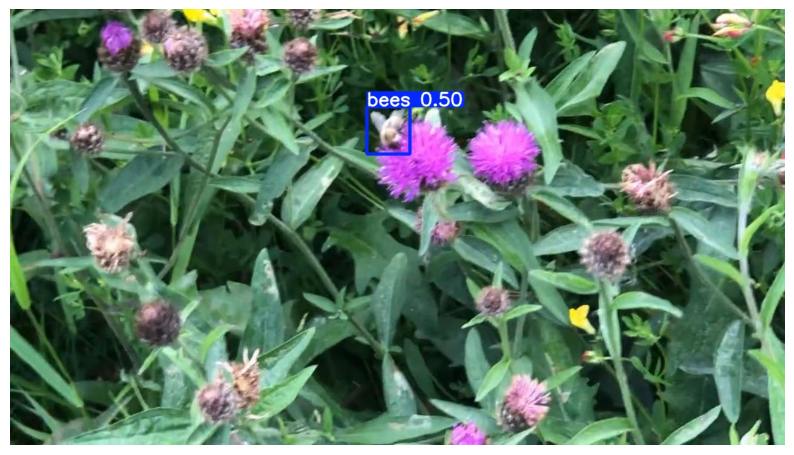

In [9]:
show_predicted_image(99)

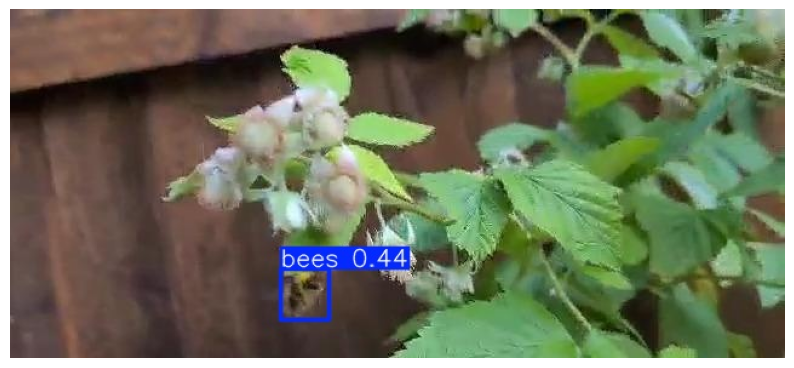

In [10]:
show_predicted_image(250)

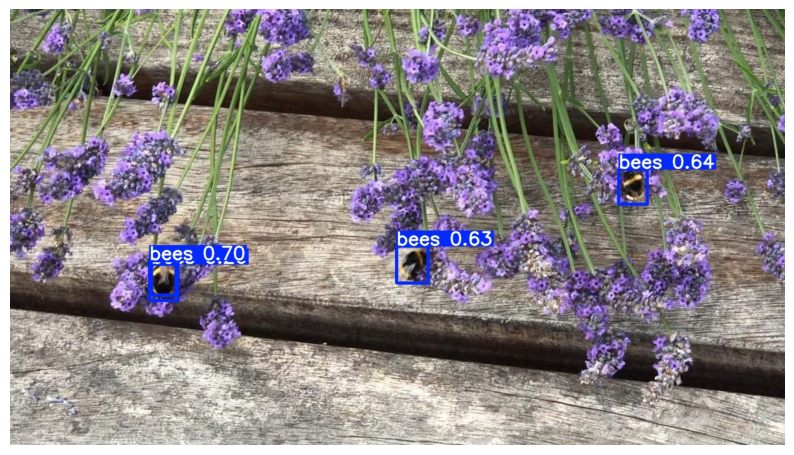

In [11]:
show_predicted_image(499)